In [232]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [233]:
pd.options.mode.chained_assignment = None #get rid of .loc warning

In [234]:
pwd

'C:\\Users\\chris\\OneDrive\\Diaporthe\\csv_files'

In [235]:
cd /Users/chris/OneDrive/Diaporthe/csv_files

C:\Users\chris\OneDrive\Diaporthe\csv_files


In [236]:
data = pd.read_csv('macro_067_complete_summary.csv', header=0)

In [237]:
data.head(1)

,macrogen_id,brip_id,mac_id,gene_region,f_primer,r_primer,m13_vector,pcr_date,band_intensity,isolate_type,notes,M13F_qual>20,M13R_qual>20,direction,accession,organism,nt_match,nt_total,percent_match
0,74,BRIP-66142,MAC-17-43,EF,EF-728F,EF-986R,Yes,5/03/2018,dimer,Chris honours isolates,NaN,98,122,M13F,KF576255.1,Diaporthe lithocarpus strain CGMCC 3.17101 tra...,220,267,82


In [238]:
ef_samples = data[(data['gene_region'] == 'EF')]
tub_samples = data[(data['gene_region'] == 'TUB')]
its_samples = data[(data['gene_region'] == 'ITS')]

In [239]:
x = tub_samples['band_intensity']
y = tub_samples['M13F_qual>20']

In [240]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

Check if quality of F and R read is correlated. When one primer works well, they both usually seem to, so it's expected there will be a strong positive correlation

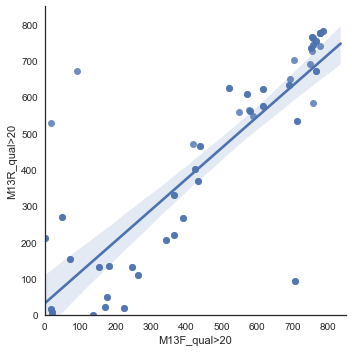

In [241]:
%matplotlib inline

g = sns.lmplot(x='M13F_qual>20', y='M13R_qual>20', data=tub_samples);
g = g.set(xlim=(0, 850), ylim=(0,850))

In [242]:
len(data['M13R_qual>20'])

157

In [243]:
data['M13F_qual>20'].corr(data['M13R_qual>20'])

0.86631364086096829

In [244]:
# data.corr()       #for full correlation matrix

Not necessary at all, but to make a new dataframe from the subset of an old dataframe, use the .copy() method.

In [245]:
#corrdf = data[['M13F_qual>20', 'M13R_qual>20']].copy()

Seaborn plot of M13F/R for all gene regions.

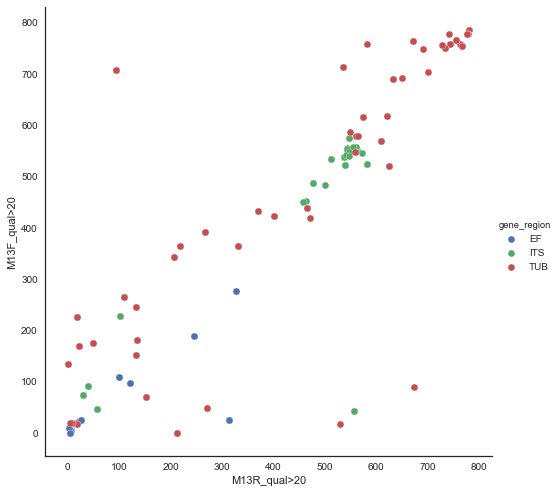

In [246]:
sns.pairplot(x_vars=['M13R_qual>20'], y_vars=['M13F_qual>20'], data=data, hue='gene_region', size=7)

In [247]:
tub_BQ_mean_F = tub_samples.groupby('band_intensity')['M13F_qual>20'].mean()
tub_BQ_sd_F = tub_samples.groupby('band_intensity')['M13F_qual>20'].std()

tub_BQ_mean_R = tub_samples.groupby('band_intensity')['M13R_qual>20'].mean()
tub_BQ_sd_R = tub_samples.groupby('band_intensity')['M13R_qual>20'].std()

band_intensities = tub_BQ_mean_F.index.values

In [248]:
tub_BQ_sd_R

band_intensity
average    225.394482
contam       0.000000
strong     179.304821
weak       168.735831
Name: M13R_qual>20, dtype: float64

Important: Since band intensity names are saved on the indexes in the above (tub_BQ_mean), use *tub_BQ_mean.index.values* to access them

<Container object of 4 artists>

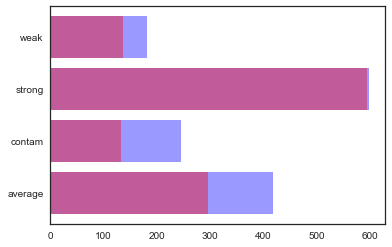

In [249]:
plt.barh(band_intensities, tub_BQ_mean_F, alpha=0.40, color='b')
plt.barh(band_intensities, tub_BQ_mean_R, alpha=0.40, color='r')

The parameters for subplot are: number of rows, number of columns, and which subplot you're currently on

    plt.subplot(#, #, #)
    plt.tight_layout()          <- maximises distance between plots of doing multiple

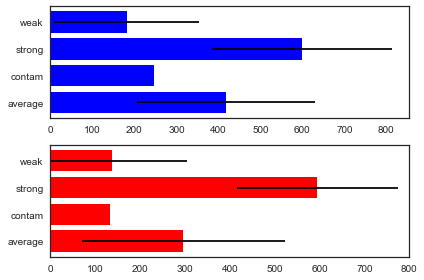

In [295]:
plt.subplot(2, 1, 1)
plt.barh(band_intensities, tub_BQ_mean_F, xerr=tub_BQ_sd_F, color='b')

plt.subplot(2, 1, 2)
plt.barh(band_intensities, tub_BQ_mean_R, xerr=tub_BQ_sd_R, color='r')
plt.xlim(0,800)

plt.tight_layout()


In [251]:
tub_samples = data[(data['gene_region'] == 'TUB')]
tub_samples

,macrogen_id,brip_id,mac_id,gene_region,f_primer,r_primer,m13_vector,pcr_date,band_intensity,isolate_type,notes,M13F_qual>20,M13R_qual>20,direction,accession,organism,nt_match,nt_total,percent_match
70,1,BRIP-66142,MAC-17-43,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,617,621,M13F,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,697,746,93
71,1,BRIP-66142,MAC-17-43,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,617,621,M13R,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,698,766,91
72,2,BRIP-66143,MAC-17-44,TUB,T1,bt2b,Yes,28/02/2018,weak,Chris honours isolates,NaN,17,17,M13F,-,-,-,-,-
73,2,BRIP-66143,MAC-17-44,TUB,T1,bt2b,Yes,28/02/2018,weak,Chris honours isolates,NaN,17,17,M13R,-,-,-,-,-
74,3,BRIP-66144,MAC-17-45,TUB,T1,bt2b,Yes,21/02/2018,weak,Chris honours isolates,NaN,70,153,M13F,-,-,-,-,-
75,3,BRIP-66144,MAC-17-45,TUB,T1,bt2b,Yes,21/02/2018,weak,Chris honours isolates,NaN,70,153,M13R,KF576299.1,Diaporthe lithocarpus strain CGMCC 3.17102 bet...,222,245,91
76,4,BRIP-66145,MAC-17-46,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,786,781,M13F,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,726,749,97
77,4,BRIP-66145,MAC-17-46,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,786,781,M13R,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,732,756,97
78,5,BRIP-66146,MAC-17-47,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,48,270,M13F,KX186672.1,Neopestalotiopsis sp. BRIP 63755a beta-tubulin...,28,28,100
79,5,BRIP-66146,MAC-17-47,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,48,270,M13R,KF576298.1,Diaporthe lithocarpus strain LC0785 beta-tubul...,350,388,90


Okay, I want to look at the distribution of different isolates sequenced for beta tubulin. Hopefully I can get a feel for how many south african isolates went compared to mine/femis isolates

In [252]:
tub_samples['isolate_type'].unique()

array(['Chris honours isolates', 'Chris Honours isolates',
       'South African Isolates', 'Olumide isolates',
       'Femi husk rot series isolates', 'South African isolates'], dtype=object)

Clean the headings first. We can see there are two capitalisations of Honours/South African isolates that will affect groupby()

In [253]:
lower_i_mask = tub_samples['isolate_type'] == 'South African isolates'
tub_samples.loc[lower_i_mask, 'isolate_type'] = 'South African Isolates'

In [254]:
upper_H_mask = tub_samples['isolate_type'] == 'Chris Honours isolates'
tub_samples.loc[upper_H_mask, 'isolate_type'] = 'Chris honours isolates'

In [255]:
tub_samples

,macrogen_id,brip_id,mac_id,gene_region,f_primer,r_primer,m13_vector,pcr_date,band_intensity,isolate_type,notes,M13F_qual>20,M13R_qual>20,direction,accession,organism,nt_match,nt_total,percent_match
70,1,BRIP-66142,MAC-17-43,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,617,621,M13F,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,697,746,93
71,1,BRIP-66142,MAC-17-43,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,617,621,M13R,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,698,766,91
72,2,BRIP-66143,MAC-17-44,TUB,T1,bt2b,Yes,28/02/2018,weak,Chris honours isolates,NaN,17,17,M13F,-,-,-,-,-
73,2,BRIP-66143,MAC-17-44,TUB,T1,bt2b,Yes,28/02/2018,weak,Chris honours isolates,NaN,17,17,M13R,-,-,-,-,-
74,3,BRIP-66144,MAC-17-45,TUB,T1,bt2b,Yes,21/02/2018,weak,Chris honours isolates,NaN,70,153,M13F,-,-,-,-,-
75,3,BRIP-66144,MAC-17-45,TUB,T1,bt2b,Yes,21/02/2018,weak,Chris honours isolates,NaN,70,153,M13R,KF576299.1,Diaporthe lithocarpus strain CGMCC 3.17102 bet...,222,245,91
76,4,BRIP-66145,MAC-17-46,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,786,781,M13F,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,726,749,97
77,4,BRIP-66145,MAC-17-46,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,786,781,M13R,KF170920.1,Diaporthe fraxini-angustifoliae strain BRIP 54...,732,756,97
78,5,BRIP-66146,MAC-17-47,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,48,270,M13F,KX186672.1,Neopestalotiopsis sp. BRIP 63755a beta-tubulin...,28,28,100
79,5,BRIP-66146,MAC-17-47,TUB,T1,bt2b,Yes,21/02/2018,strong,Chris honours isolates,NaN,48,270,M13R,KF576298.1,Diaporthe lithocarpus strain LC0785 beta-tubul...,350,388,90


In [256]:
tub_F = tub_samples.groupby('isolate_type')['M13F_qual>20'].mean()
tub_R = tub_samples.groupby('isolate_type')['M13R_qual>20'].mean()

In [257]:
tub_F.index

Index(['Chris honours isolates', 'Femi husk rot series isolates',
       'Olumide isolates', 'South African Isolates'],
      dtype='object', name='isolate_type')

Text(0.5,1,'Reverse')

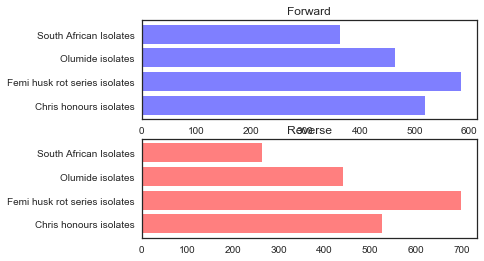

In [267]:
plt.tight_layout()

plt.subplot(2, 1, 1)
plt.barh(tub_F.index, tub_F, alpha = 0.50, color='b')
plt.title("Forward")

plt.subplot(2, 1, 2)
plt.barh(tub_R.index, tub_R, alpha = 0.50, color='r')
plt.title("Reverse")

In [290]:
tub_samples['M13F_qual>20'].values.max()

786

(0, 800)

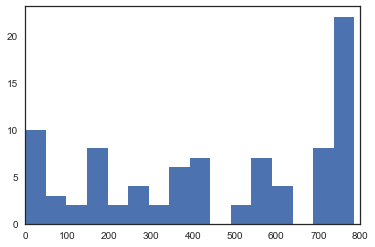

In [292]:
plt.hist(tub_samples['M13F_qual>20'], bins=16)
plt.xlim(0,800)

In [272]:
tub_samples['isolate_type'].unique()

array(['Chris honours isolates', 'South African Isolates',
       'Olumide isolates', 'Femi husk rot series isolates'], dtype=object)

In [315]:
hon = tub_samples[tub_samples['isolate_type'] == 'Chris honours isolates']
saf = tub_samples[tub_samples['isolate_type'] == 'South African Isolates']
olumi = tub_samples[tub_samples['isolate_type'] == 'Olumide isolates']
femi = tub_samples[tub_samples['isolate_type'] == 'Femi husk rot series isolates']

hist_hon = hon['M13F_qual>20']
hist_saf = saf['M13F_qual>20']
hist_olumi = olumi['M13F_qual>20']
hist_femi = femi['M13F_qual>20']

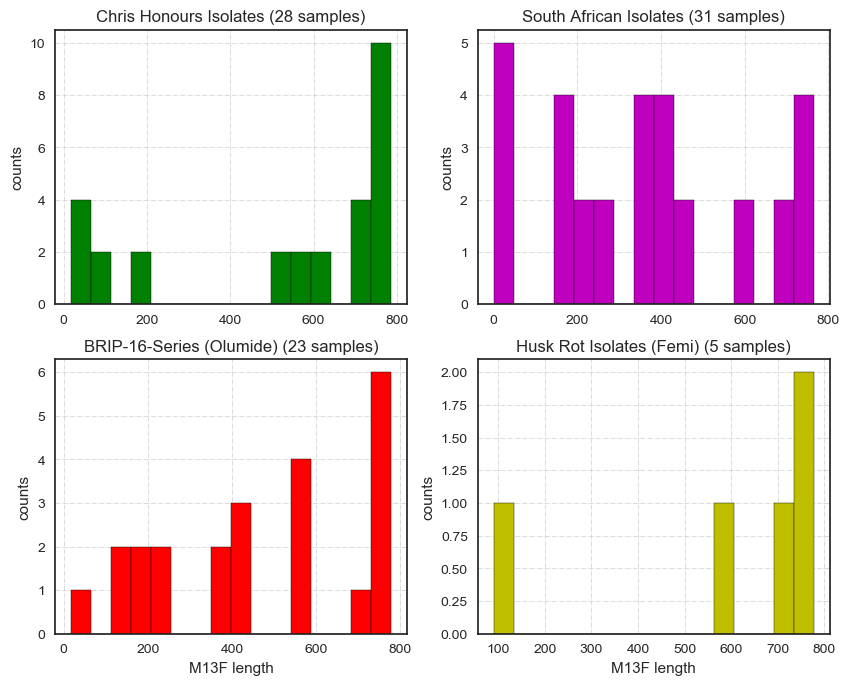

In [373]:
fig = plt.figure(figsize=(10, 8), dpi= 100, facecolor='w', edgecolor='k')



ax = fig.add_subplot(2, 2, 1)
plt.hist(hist_hon, bins=16, color='g', edgecolor='black')
plt.title("Chris Honours Isolates (%i samples)" % len(hist_hon))
plt.ylabel('counts')
ax.grid(True, linewidth=0.5, linestyle='-.')

ax = fig.add_subplot(2, 2, 2)
plt.hist(hist_saf, bins=16, color='m', edgecolor='black')
plt.title("South African Isolates (%i samples)" % len(hist_saf))
plt.ylabel('counts')
plt.grid(True, linewidth=0.5, linestyle='-.')

ax = fig.add_subplot(2, 2, 3)
plt.hist(hist_olumi, bins=16, color='r', edgecolor='black')
plt.title("BRIP-16-Series (Olumide) (%i samples)" % len(hist_olumi))
plt.ylabel('counts')
plt.xlabel('M13F length')
plt.grid(True, linewidth=0.5, linestyle='-.')

ax = fig.add_subplot(2, 2, 4)
plt.hist(hist_femi, bins=16, color='y', edgecolor='black')
plt.title("Husk Rot Isolates (Femi) (%i samples)" % len(hist_femi))
plt.ylabel('counts')
plt.xlabel('M13F length')
plt.grid(True, linewidth=0.5, linestyle='-.')